# TP séance 7 - Arbres et plus courts chemins
L'objectif de ce TP est d'implémenter les algorithmes de Kruskal, Prim et Dijkstra vus en cours.
L'algorithme de Dijkstra sera utilisé pour un problème concret : calculer le meilleur itinéraire entre deux points d'une ville, et l'afficher sur une carte.

In [6]:
import networkx as nx
import random
import matplotlib.pyplot as plt

## Exercice 1 : algorithme de Kruskal


### Q.1
Utilisez les fonctions de NetworkX pour générer des graphes aléatoires *pondérés*, et afficher les poids des arêtes sur le graphe ; vous pourrez utiliser un graphe de type $G_{n,m}$, avec environ 1,5 fois plus d'arêtes que de sommets.

[(0, 3), (0, 1), (1, 2), (1, 6), (1, 9), (1, 3), (1, 4), (2, 3), (2, 5), (2, 6), (2, 9), (3, 9), (4, 5), (5, 8), (6, 9), (6, 7), (8, 9)]
[(0, 3, {'weight': 2}), (0, 1, {'weight': 3}), (1, 2, {'weight': 8}), (1, 6, {'weight': 7}), (1, 9, {'weight': 2}), (1, 3, {'weight': 2}), (1, 4, {'weight': 4}), (2, 3, {'weight': 2}), (2, 5, {'weight': 9}), (2, 6, {'weight': 7}), (2, 9, {'weight': 10}), (3, 9, {'weight': 2}), (4, 5, {'weight': 10}), (5, 8, {'weight': 9}), (6, 9, {'weight': 10}), (6, 7, {'weight': 6}), (8, 9, {'weight': 9})]


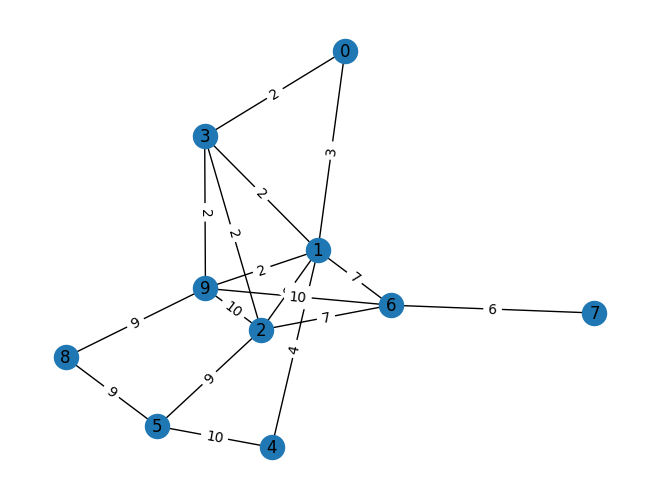

In [45]:
def random_graph():
    n = random.randint(7,10)
    m = random.randint(round(1.3*n),round(1.7*n))

    # Création du graphe aléatoire pondéré
    G = nx.gnm_random_graph(n, m)
    print(G.edges())

    # Attribution de poids aléatoires aux arêtes
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.randint(1, 10)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    return G

plt.figure(1)
G=random_graph()
print(G.edges(data=True))

#plt.show() #décommenter si on souhaite se débarasser de la liste des arêtes


### Q.2 
Implémentez l'algorithme de Kruskal et testez-le sur un graphe pondéré aléatoire, d'abord en affichant la *liste* des arêtes de l'arbre couvrant de poids minimum, puis en mettant en évidence ces arêtes sur le graphe. Comment détecter / empêcher la formation d'un cycle ?

{(0, 3): Text(-0.3454914391040802, -0.4755282839152457, '2'),
 (0, 1): Text(-0.9045084714889526, -0.29389269550772923, '3'),
 (1, 2): Text(-0.5590170323848724, -0.7694208920001984, '8'),
 (1, 6): Text(2.9802322387695312e-08, -2.9802322387695312e-08, '7'),
 (1, 9): Text(-0.8090168833732605, 8.940696716308594e-08, '2'),
 (1, 3): Text(-0.24999991059303284, -0.7694208920001984, '2'),
 (1, 4): Text(1.4901161193847656e-07, -0.5877851247787476, '4'),
 (2, 3): Text(0.0, -0.9510564804077148, '2'),
 (2, 5): Text(0.3454914391040802, -0.47552815278108085, '9'),
 (2, 6): Text(0.24999994039535522, -0.18163561820983887, '7'),
 (2, 9): Text(-0.5590169727802277, -0.18163549900054932, '10'),
 (3, 9): Text(-0.24999985098838806, -0.18163549900054932, '2'),
 (4, 5): Text(0.9045086205005646, -0.29389238555963004, '10'),
 (5, 8): Text(0.34549129009246826, 0.4755282680219892, '9'),
 (6, 9): Text(8.940696716308594e-08, 0.5877853631973267, '10'),
 (6, 7): Text(0.5590168982744217, 0.7694209218025208, '6'),
 (8, 

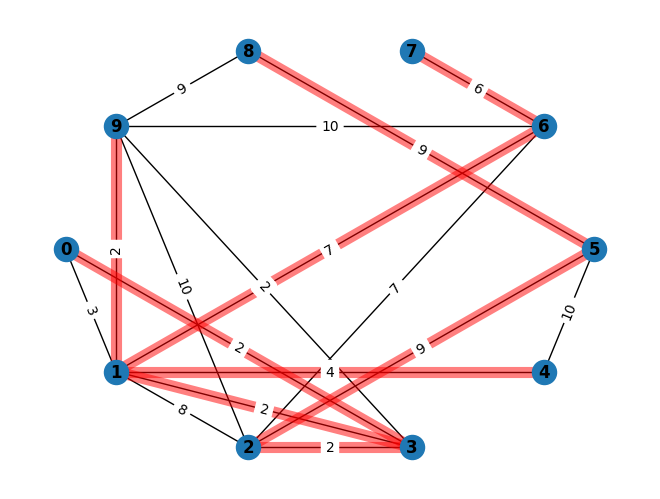

In [46]:
def kruskal(graph):
    tree = nx.Graph()
    lst = []
    
    
    for edge in graph.edges(data=True):
        lstnode = []
        lsti=[]
        node1 = edge[0]
        node2 = edge[1]
        weight = edge[2]['weight']
        lstnode.append(node1)
        lstnode.append(node2)
        lsti.append(lstnode)
        lsti.append(weight)
        lst.append(lsti)
    edges = sorted(lst, key = lambda x: x[1])



    lstedege=[]
    for edge in edges:
        node1 = edge[0][0]
        node2 = edge[0][1]
        weight = edge[1]
        tree.add_edge(node1, node2, weight=weight)
        try: 
            nx.find_cycle(tree,node1)
            tree.remove_edge(node1, node2)
        except:
            tupl = (node1,node2)
            lstedege.append(tupl)
            

    return lstedege

plt.figure(2)
lst = kruskal(G)
nx.draw(G, with_labels=True, pos = nx.shell_layout(G), font_weight='bold')
nx.draw_networkx_edges(G, pos=nx.shell_layout(G), edgelist=lst, width=8, alpha=0.5, edge_color='r')
nx.draw_networkx_edge_labels(G, pos=nx.shell_layout(G), edge_labels=nx.get_edge_attributes(G,'weight'))





## Exercice 2 : algorithme de Prim
Implémentez l'algorithme de Prim ; pensez à le tester également !

[(0, 7), (0, 1), (1, 8), (1, 6), (1, 2), (2, 4), (3, 6), (4, 8), (4, 7), (4, 5), (6, 8), (7, 8)]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Edge : Weight

0-7:6
7-4:1
4-5:1
4-2:3
2-1:4
1-6:4
6-8:2
6-3:9


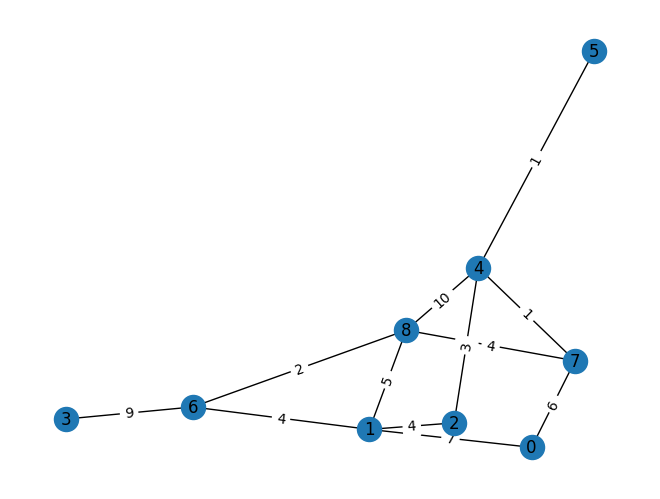

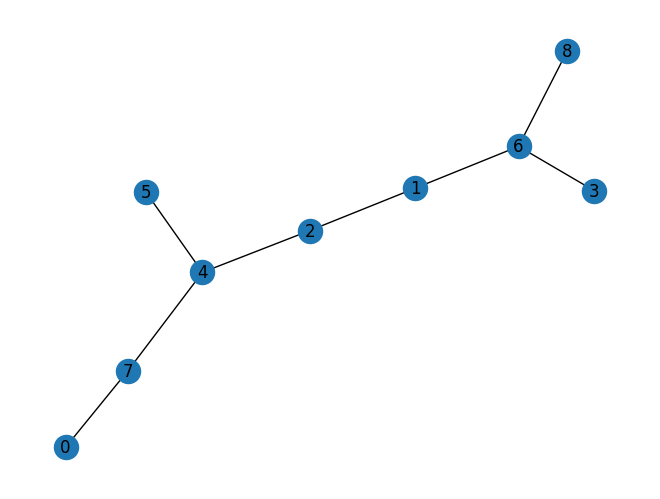

In [50]:
#"Petite" aide je l'avoue d'internet .....

G = random_graph()

mat = nx.adjacency_matrix(G).todense()

#liste de taille n de 0:
selected_node = [0] * len(G.edges())
print(selected_node)

no_edge = 0

selected_node[0] = True

T =  nx.Graph()
lst=[]

# printing for edge and weight
print("Edge : Weight\n")
while (no_edge < len(G.edges()) - 1):
    minimum = 9999999
    a = 0
    b = 0
    for m in range(len(G.edges())):
        if selected_node[m]:
            for n in range(len(G.edges())):
                if ((not selected_node[n]) and G.has_edge(m,n)):  
                    # not in selected and there is an edge
                    if minimum > mat[m,n]:
                        minimum = mat[m,n]
                        a = m
                        b = n
    if (a != b):
        print(str(a) + "-" + str(b) + ":" + str(mat[a,b]))
        lst.append((a,b))
    selected_node[b] = True
    no_edge += 1
T.add_edges_from(lst)
plt.figure(2)
nx.draw(T, with_labels=True)


## Exercice 3 : Algorithme de Dijkstra
Ecrivez une fonction `dijkstra(G, s, d)` qui prend un graphe pondéré en entrée, et calcule le plus court chemin du sommet source `s` vers le sommet destination `d`. Votre fonction doit retourner **la longueur de l'itinéraire (en m)** ainsi que **la liste des sommets permettant de reconstituer l'itinéraire**. Testez cette fonction sur un graphe aléatoire.

In [22]:
import heapq
import networkx as nx

#ChatGPT et valentin

def dijkstra(G, start, end):
    # Initialisation des distances à l'infini pour tous les sommets, sauf le départ à 0
    distances = {v: float('inf') for v in G.nodes()}
    distances[start] = 0

    # Initialisation de la liste de priorité avec le départ et sa distance
    heap = [(0, start)]

    # Initialisation du dictionnaire des prédécesseurs
    predecessors = {v: None for v in G.nodes()}

    # Boucle principale de l'algorithme de Dijkstra
    while heap:
        # Récupération du sommet avec la distance minimale dans la liste de priorité
        (current_distance, current_vertex) = heapq.heappop(heap)

        # Si on a atteint le sommet d'arrivée, on peut s'arrêter
        if current_vertex == end:
            break

        # Sinon, on examine les voisins du sommet actuel
        for neighbor in G.neighbors(current_vertex):
            # Calcul de la distance entre le sommet actuel et le voisin
            distance = current_distance + G.edges[current_vertex, neighbor]['weight']

            # Si la distance calculée est plus petite que celle enregistrée pour ce voisin, on la met à jour
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_vertex
                heapq.heappush(heap, (distance, neighbor))

    # Construction de la liste de sommets représentant le chemin le plus court
    path = []
    current_vertex = end
    while current_vertex is not None:
        path.insert(0, current_vertex)
        current_vertex = predecessors[current_vertex]

    # Si le chemin le plus court n'a pas été trouvé, on retourne une liste vide
    if distances[end] == float('inf'):
        return []

    # Sinon, on retourne la liste de sommets représentant le chemin le plus court
    return path


# Exemple de graphe
lst = dijkstra(G, 0, 6)
print(lst)

[0, 1, 4, 6]


## Exercice 4 : Application au calcul d'itinéraire
[OSMnx](https://geoffboeing.com/2016/11/osmnx-python-street-networks/) est un package Python permettant d'exploiter au format NetworkX les données disponibles sur [OpenStreetMap](https://openstreetmap.org). Il permet notamment de récupérer toutes les informations du réseau routier, piéton, de transports en commun, etc. et de le manipuler avec NetworkX. De nombreux exemples sont disponibles [sur cette page](https://github.com/gboeing/osmnx-examples).

Google Colaboratory permet d'exécuter des notebooks sur lesquels OSMnx et toutes ses dépendances sont installées.

**Note** : Vous pouvez aussi bien sûr travailler en local, mais il vous faudra installer OSMnx et toutes ses dépendances.

On commence par installer la librairie OSMnx :

*Edit 2023 : la version 1.24 de `numpy` pose problème dans Colab ; on force l'installation de la version 1.23*

In [ ]:
%pip install numpy==1.23
%pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 13.2 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [96 lines of output]
      <string>:71: RuntimeWarning: NumPy 1.23.0 may not yet support Python 3.11.
      Running from numpy source directory.
      <string>:86: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
      running egg_info
      running build_src
      INFO: build_src
      cre

On importe ensuite les paquets nécessaires :

In [26]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)

/opt/homebrew/lib/python3.11/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


*A partir de maintenant, toutes les informations, fonctions... sont à chercher dans les documentations fournies au début de cette section.*

**Affichez le réseau routier de Lyon :**

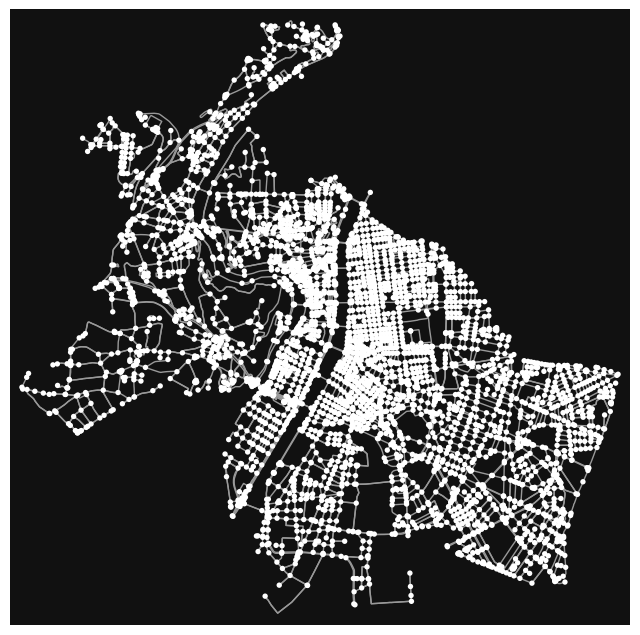

In [51]:
ox.plot_graph(ox.graph_from_place('Lyon,France', network_type='drive'))
plt.show()

Par défaut, les sommets sont affichés ; quand ils sont trop nombreux, ils nuisent à la lisibilité du graphe. **Affichez de nouveau le réseau routier, en jaune, dans une image de taille 10x10, et sans afficher les sommets.**

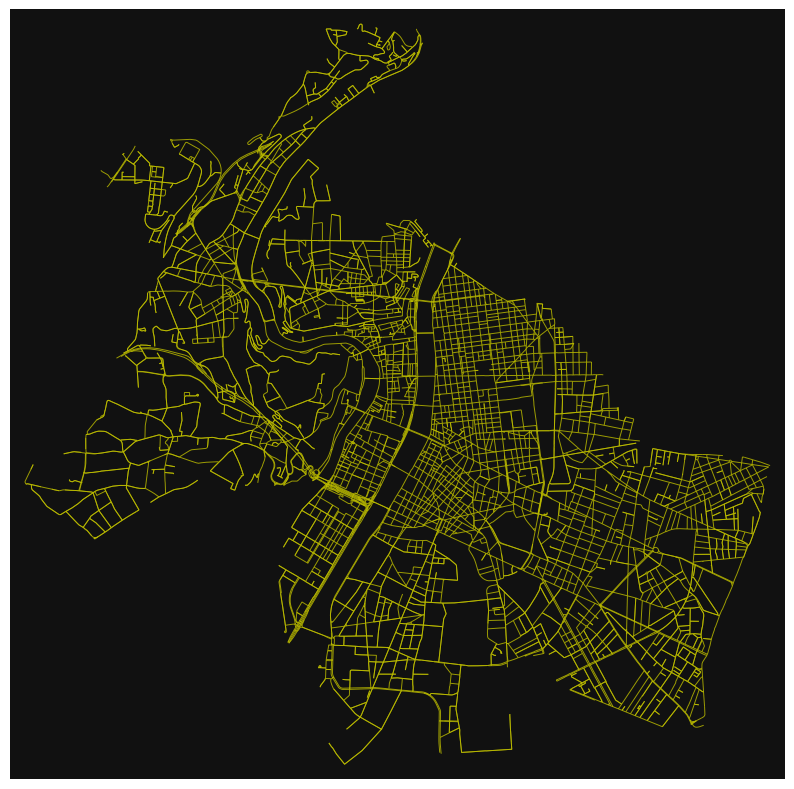

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [52]:
ox.plot_graph(ox.graph_from_place('Lyon, France', network_type='drive'), figsize=(10,10), node_size = 0, edge_color='y', edge_linewidth=0.7, edge_alpha=0.8)

**Combien de sommets et d'arêtes ce graphes comporte-t-il ?**



In [43]:
Lyon = ox.graph_from_place('Lyon, France', network_type='drive')
print('Il y a ', Lyon.number_of_nodes(), ' noeuds')

Il y a  4249  noeuds


In [44]:
print('Il y a ', Lyon.number_of_edges(), ' aretes')

Il y a  8477  aretes


**Superposez le réseau routier sur une carte de Lyon** (il existe une fonction d'affichage d'OSMnx pour ça ;)) ; **faites-en sorte que le nom d'une rue soit affiché quand on clique dessus**.

A présent, l'idée est de déterminer le plus court chemin entre les deux points géographiques fournis, à l'aide de l'algorithme de Dijkstra codé ci-dessus, et de l'afficher sur la carte.

Les *numéros* des sommets donnés par OpenStreetMap sont ceux de sa base de données *mondiale* : il peuvent être très grands (de l'ordre du milliard pour certains) et surtout ne pas être consécutifs. **Si besoin, modifiez votre fonction `dijkstra` pour qu'elle puisse gérer des numéros de sommets quelconques.**

La fonction `nearest_nodes` renvoie le sommet / noeud du graphe le plus proche des coordonnées géographiques (longitude, latitude) données en paramètre. Récupérez les coordonnées des deux points géographiques fournis (via Google Maps, ou [OpenStreetMap](https://www.openstreetmap.org) en faisant un clic-droit puis *Affichez l'adresse*) et affichez les numéros des sommets les plus proches.

Appliquez votre fonction `dijkstra` aux deux sommets du graphe, puis superposez en rouge l'itinéraire obtenu :